In [43]:
import pandas as pd
import matplotlib.pyplot as plt

Read original data

In [50]:
drinks = pd.read_csv("../OriginalData/drinks.csv", index_col=0)

In [23]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
country,,,,
Afghanistan,0,0,0,0.0
Albania,89,132,54,4.9
Algeria,25,0,14,0.7
Andorra,245,138,312,12.4
Angola,217,57,45,5.9


In [24]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 193 non-null    int64  
 1   spirit_servings               193 non-null    int64  
 2   wine_servings                 193 non-null    int64  
 3   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.5+ KB


In [25]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


Data from drinks.csv already looks good because there are no NaN values etc.

Creation of new column total servings which contains beer, spirit and wine servings sum up

In [26]:
drinks_p = drinks
drinks_p['total_servings'] =drinks_p['beer_servings'] + drinks_p['spirit_servings'] + drinks_p['wine_servings']

In [27]:
drinks_p.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_servings
country,,,,,
Afghanistan,0,0,0,0.0,0
Albania,89,132,54,4.9,275
Algeria,25,0,14,0.7,39
Andorra,245,138,312,12.4,695
Angola,217,57,45,5.9,319


Saving processed data frame to csv

In [30]:
drinks_p.to_csv(path_or_buf="../AnalysisData/drinks_p.csv")

In [38]:
drinks_servings_largest = drinks_p.nlargest(10, 'total_servings')
drinks_servings_largest

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,total_servings
country,,,,,
Andorra,245,138,312,12.4,695
Czech Republic,361,170,134,11.8,665
Grenada,199,438,28,11.9,665
France,127,151,370,11.8,648
Russian Federation,247,326,73,11.5,646
Lithuania,343,244,56,12.9,643
Luxembourg,236,133,271,11.4,640
Germany,346,117,175,11.3,638
Hungary,234,215,185,11.3,634


Bar plot of top 10 countries in total litres of pure alcohol consumption

<AxesSubplot:xlabel='country'>

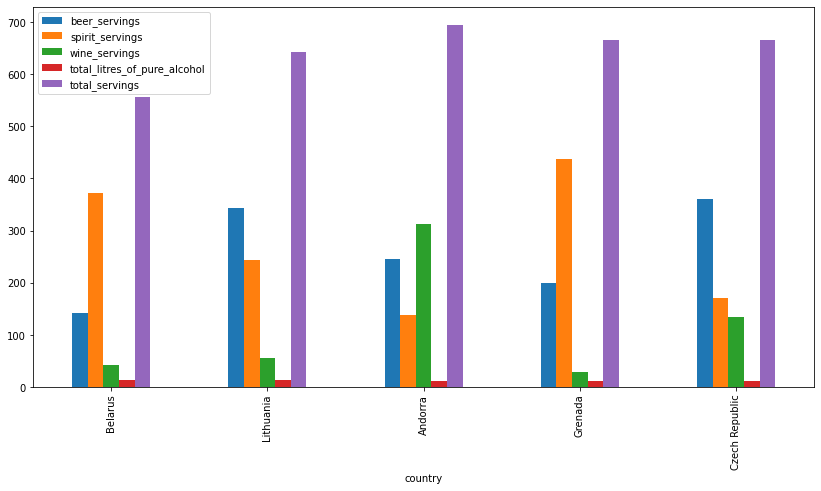

In [49]:
drinks_p.nlargest(5, 'total_litres_of_pure_alcohol').plot.bar(figsize=(14,7))

Plot witch top 10 countries by total servings

<AxesSubplot:xlabel='country'>

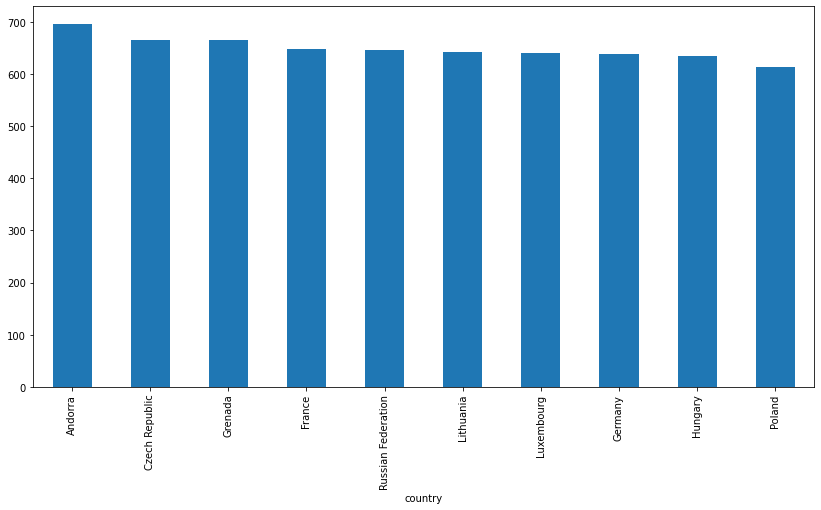

In [44]:
drinks_servings_largest['total_servings'].plot.bar(figsize=(14,7))